In [ ]:
import pandas as pd
import numpy as np



# Focos de calor

### Desde 1998, diariamente o INPE disponibiliza dados de focos de calor de vários satélites. Os dados das passagens noturnas dos satélites NOAA e dos satélites Terra e Aqua (sensor MODIS) são carregados no sistema de informações do IBAMA. Por meio de um sistema de informações geográficas, imagens de satélites e várias bases com informações detalhadas sobre todo o território nacional, a equipe de monitoramento identifica áreas de risco de ocorrência de incêndios.

### Os focos de calor detectados nas áreas de risco entram em um sistema de alerta que os classifica de acordo com a persistência, a localidade e o risco que oferecem.

Link = https://snif.florestal.gov.br/pt-br/incendios-florestais


#Análise dos focos de calor de 1998 a 2019

Carregamento dos dados e visão geral

In [ ]:
df = pd.read_excel("focos_calor_1998_2019.xlsx")

df

,Ano,Mês,Número,Período
0,1998,Janeiro,0,1998-01-01 00:00:00
1,1999,Janeiro,1081,1999-01-01 00:00:00
2,2000,Janeiro,778,2000-01-01 00:00:00
3,2001,Janeiro,547,2001-01-01 00:00:00
4,2002,Janeiro,1653,2002-01-01 00:00:00
...,...,...,...,...
320,2018,Total,132955,2018-12-01 00:00:00
321,2019,Total,5685,2019-12-01 00:00:00
322,Máximo,Total,394004,Máximo
323,Média,Total,228082,Média


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 298
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ano      276 non-null    object
 1   Mês      276 non-null    object
 2   Número   276 non-null    int64 
 3   Período  276 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.8+ KB


#Análise Inicial

In [ ]:
#maior qntd de focos de calor
df["Número"].max()

394004

In [ ]:
#qual mes/ano te a maior qntd

Encontra o valor máximo na coluna "Número" do DataFrame, que representa a maior quantidade de focos de calor.

In [ ]:
df[df["Número"] == df["Número"].max()]

,Ano,Mês,Número,Período
309,2007,Total,394004,2007-12-01 00:00:00
322,Máximo,Total,394004,Máximo


#Eliminando linhas indesejaveis

Remove as linhas onde a coluna "Mês" é igual a "Total" e onde a coluna "Ano" é igual a "Máximo", "Médio" ou "Mínimo".

Contêm valores agregados ou estatísticos que não facilitam a análise.


In [ ]:
df =df[df["Mês"] != "Total" ]


In [ ]:
df =df[df["Ano"] != "Máximo" ]

df =df[df["Ano"] != "Médio" ]

df =df[df["Ano"] != "Mínimo" ]

In [ ]:
df[df["Número"] == df["Número"].max()]

,Ano,Mês,Número,Período
209,2007,Setembro,141236,2007-09-01 00:00:00


#Gráficos

In [ ]:
#dados de 2007
df_2007 = df[df["Ano"] == 2007]
df_2007

,Ano,Mês,Número,Período
9,2007,Janeiro,4223,2007-01-01 00:00:00
34,2007,Fevereiro,2764,2007-02-01 00:00:00
59,2007,Março,3342,2007-03-01 00:00:00
84,2007,Abril,2557,2007-04-01 00:00:00
109,2007,Maio,5130,2007-05-01 00:00:00
134,2007,Junho,12724,2007-06-01 00:00:00
159,2007,Julho,19946,2007-07-01 00:00:00
184,2007,Agosto,91095,2007-08-01 00:00:00
209,2007,Setembro,141236,2007-09-01 00:00:00
234,2007,Outubro,67234,2007-10-01 00:00:00


<Axes: xlabel='Mês'>

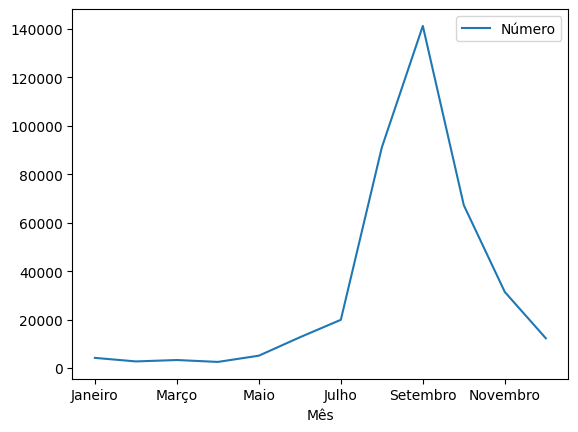

In [ ]:
df_2007.plot(x="Mês",y="Número")

<Axes: xlabel='Mês'>

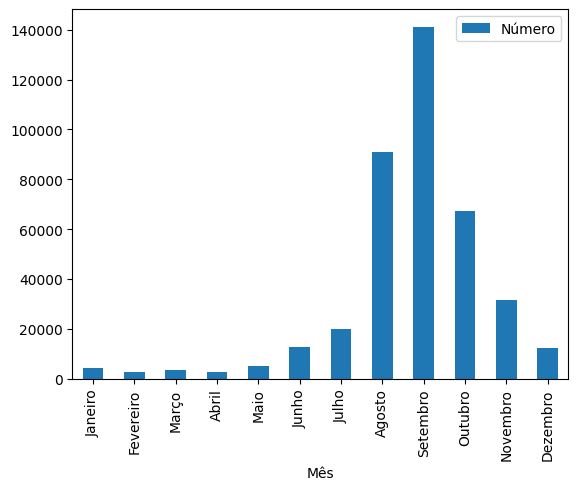

In [ ]:
df_2007.plot.bar(x="Mês",y="Número")

<Axes: ylabel='Número'>

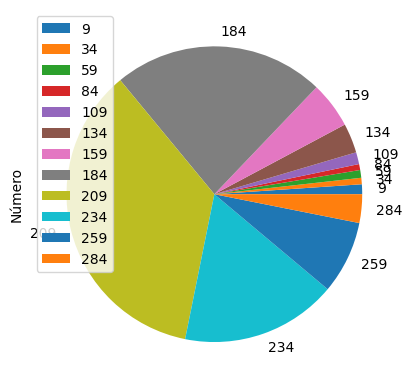

In [ ]:
df_2007.plot.pie(x="Mês",y="Número")
#ruim

In [ ]:
df

,Ano,Mês,Número,Período
0,1998,Janeiro,0,1998-01-01 00:00:00
1,1999,Janeiro,1081,1999-01-01 00:00:00
2,2000,Janeiro,778,2000-01-01 00:00:00
3,2001,Janeiro,547,2001-01-01 00:00:00
4,2002,Janeiro,1653,2002-01-01 00:00:00
...,...,...,...,...
293,2016,Dezembro,8216,2016-12-01 00:00:00
294,2017,Dezembro,11666,2017-12-01 00:00:00
295,2018,Dezembro,5113,2018-12-01 00:00:00
296,2019,Dezembro,0,2019-12-01 00:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Janeiro'),
  Text(1, 0, 'Fevereiro'),
  Text(2, 0, 'Março'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Maio'),
  Text(5, 0, 'Junho'),
  Text(6, 0, 'Julho'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Setembro'),
  Text(9, 0, 'Outubro'),
  Text(10, 0, 'Novembro'),
  Text(11, 0, 'Dezembro')])

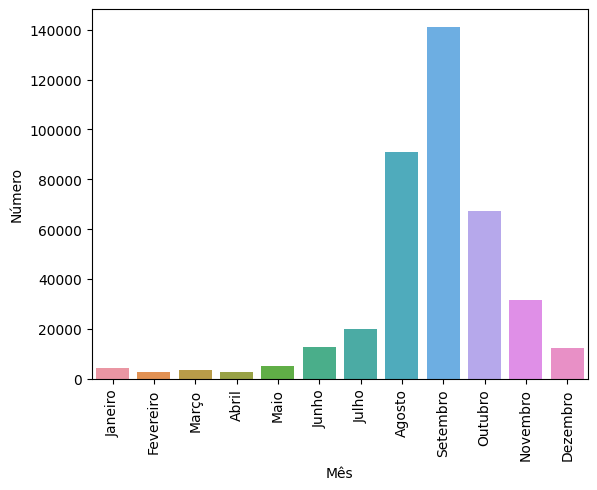

In [ ]:
sns.barplot(x="Mês",y="Número",data=df_2007)
plt.xticks(rotation=90)